In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
# 공공데이터포털 교육부 학생건강검사 결과
df = pd.read_csv("../datasets/weight_height.csv", encoding="euc-kr")
df

,고유식별번호(ID),최종가중치,학교고유번호(ID),도시규모,도시규모별분석용,학년도,광역시도,시도별,학교급별,학교명,...,키,몸무게,혈당식전(mgdl),총콜레스테롤(mgdl),간기능(AST)단위(UL),간기능(ALT)단위(UL),혈색소(gdl),간염검사,수축기,이완기
0,Aa011남10101,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,125.8,27.3,NaN,NaN,NaN,NaN,NaN,NaN,77.0,58.0
1,Aa011남10102,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,124.3,25.4,NaN,NaN,NaN,NaN,NaN,NaN,83.0,51.0
2,Aa011남10103,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,119.2,23.5,NaN,NaN,NaN,NaN,NaN,NaN,103.0,65.0
3,Aa011남10104,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,115.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,92.0,66.0
4,Aa011남10105,169.550665,Aa01,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,1,서울대도초등학교,...,120.0,33.5,NaN,NaN,NaN,NaN,NaN,NaN,102.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,Ac343남30106,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,176.1,50.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9682,Ac343남30107,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,174.1,88.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9683,Ac343남30108,25.790895,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,169.5,63.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9684,Ac343여30101,23.325794,Ac34,대도시/중소도시,특별/광역시,2015,서울,서울특별시교육청,3,세종과학고등학교,...,159.2,52.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df[["학교명", "학년", "성별", "키", "몸무게"]]
df

,학교명,학년,성별,키,몸무게
0,서울대도초등학교,1,남,125.8,27.3
1,서울대도초등학교,1,남,124.3,25.4
2,서울대도초등학교,1,남,119.2,23.5
3,서울대도초등학교,1,남,115.0,20.0
4,서울대도초등학교,1,남,120.0,33.5
...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4
9682,세종과학고등학교,3,남,174.1,88.8
9683,세종과학고등학교,3,남,169.5,63.2
9684,세종과학고등학교,3,여,159.2,52.9


In [5]:
# df["학교명"] -> 초등학교 = 0 / 중학교 = 6 / 고등학교 = 9 + df["학년"]
df["grade"] = df["학교명"].map(lambda x: 0 if x.endswith("초등학교")
                            else 6 if x.endswith("중학교")
                            else 9) + df["학년"]
df

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1232\3139471150.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["grade"] = df["학교명"].map(lambda x: 0 if x.endswith("초등학교")


,학교명,학년,성별,키,몸무게,grade
0,서울대도초등학교,1,남,125.8,27.3,1
1,서울대도초등학교,1,남,124.3,25.4,1
2,서울대도초등학교,1,남,119.2,23.5,1
3,서울대도초등학교,1,남,115.0,20.0,1
4,서울대도초등학교,1,남,120.0,33.5,1
...,...,...,...,...,...,...
9681,세종과학고등학교,3,남,176.1,50.4,12
9682,세종과학고등학교,3,남,174.1,88.8,12
9683,세종과학고등학교,3,남,169.5,63.2,12
9684,세종과학고등학교,3,여,159.2,52.9,12


In [6]:
df.drop(["학교명", "학년"], axis="columns", inplace=True)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_1232\2263277364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["학교명", "학년"], axis="columns", inplace=True)


In [7]:
df. columns =["gender", "height", "weight", "grade"]
df

,gender,height,weight,grade
0,남,125.8,27.3,1
1,남,124.3,25.4,1
2,남,119.2,23.5,1
3,남,115.0,20.0,1
4,남,120.0,33.5,1
...,...,...,...,...
9681,남,176.1,50.4,12
9682,남,174.1,88.8,12
9683,남,169.5,63.2,12
9684,여,159.2,52.9,12


남학생의 몸무게를 가지고 키를 예측하자

In [8]:
df.isnull().sum()

gender    0
height    0
weight    4
grade     0
dtype: int64

In [9]:
df.isna().sum()

gender    0
height    0
weight    4
grade     0
dtype: int64

In [10]:
df.dropna(inplace=True)
print(df.isnull().sum())
print(df.isna().sum())

gender    0
height    0
weight    0
grade     0
dtype: int64
gender    0
height    0
weight    0
grade     0
dtype: int64


C:\Users\Daniel\AppData\Local\Temp\ipykernel_1232\1618821590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


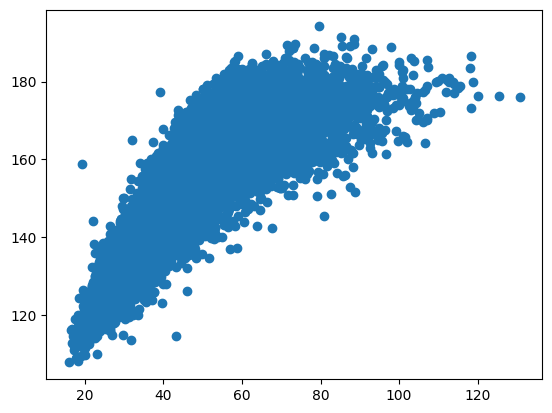

In [11]:
plt.scatter(df["weight"], df["height"], marker="o")

In [12]:
# 1.
gender_condition = df["gender"] == "남"

x = df[gender_condition][["weight"]]
y = df[gender_condition][["height"]]

In [13]:
# 2.
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [15]:
x_train.shape

(3971, 1)

In [16]:
# 3.
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
# 4. 
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
# 5.
model.score(x_test, y_test)

0.7296703678887504

In [20]:
model.predict([[78]])


c:\Users\Daniel\miniconda3\envs\multi02\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[178.16538929]])

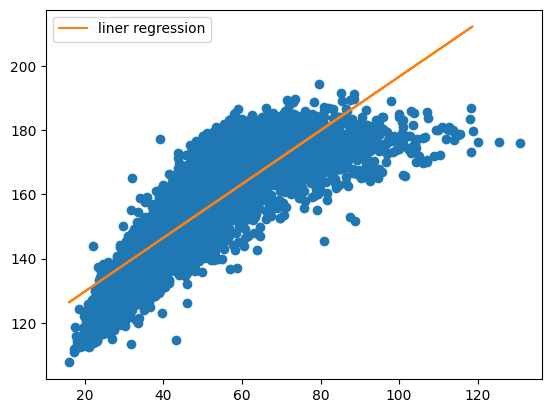

In [21]:
model01 = LinearRegression().fit(x,y)
predict_model01 = model01.predict(x_test)
plt.plot(x, y, "o")
plt.plot(x_test, predict_model01, label="liner regression")
plt.legend()

In [22]:
from sklearn.preprocessing import KBinsDiscretizer

In [23]:
bins = KBinsDiscretizer(n_bins=2, strategy="uniform", encode="onehot-dense").fit(x)
x_binned = bins.transform(x)

In [24]:
model02 = LinearRegression().fit(x_binned, y)
predict_model02 = model02.predict(bins.transform(x_test))

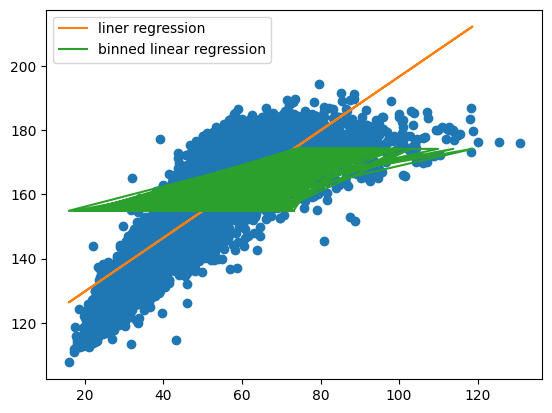

In [25]:
plt.plot(x, y, "o")
plt.plot(x_test, predict_model01, label="liner regression")
plt.plot(x_test, predict_model02, label="binned linear regression")
plt.legend()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
poly = PolynomialFeatures(degree=3)
poly.fit(x)
x_poly = poly.transform(x)

In [34]:
model03 = LinearRegression().fit(x_poly, y)
predict_model03 = model03.predict(poly.transform(x_test))

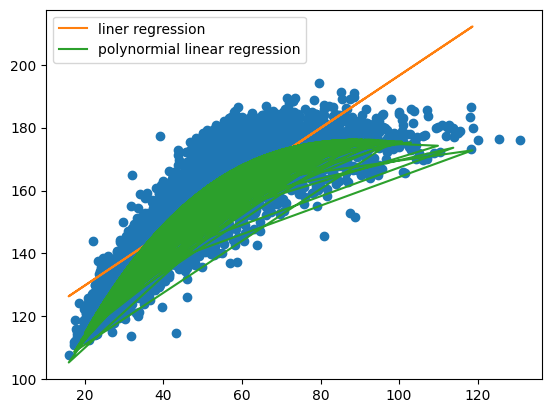

In [35]:
plt.plot(x, y, "o")
plt.plot(x_test, predict_model01, label="liner regression")
plt.plot(x_test, predict_model03, label="polynormial linear regression")
plt.legend()